In [2]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('01_DiatomInventories_GTstudentproject_B.csv') 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643872 entries, 0 to 1643871
Data columns (total 8 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   TaxonName                         1643872 non-null  object 
 1   TaxonCode                         1643872 non-null  object 
 2   SamplingOperations_code           1643872 non-null  object 
 3   CodeSite_SamplingOperations       1643872 non-null  object 
 4   Date_SamplingOperation            1643872 non-null  object 
 5   Abundance_nbcell                  1643872 non-null  int64  
 6   TotalAbundance_SamplingOperation  1643872 non-null  int64  
 7   Abundance_pm                      1643872 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 100.3+ MB


In [5]:
df.head()

,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,Achnanthes aapajaervensis,Achaa01,S04094200_20120910,S04094200,2012-09-10,8,420,19.047619
1,Achnanthes aapajaervensis,Achaa01,S05155300_20100728,S05155300,2010-07-28,1,404,2.475248
2,Achnanthes affinis,Achaf01,S02018780_20070808,S02018780,2007-08-08,1,400,2.500000
3,Achnanthes affinis,Achaf01,S02022675_20090803,S02022675,2009-08-03,2,400,5.000000
4,Achnanthes affinis,Achaf01,S02094920_20120726,S02094920,2012-07-26,1,400,2.500000


In [6]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [7]:
valores_nulos=df.isnull().sum()
valores_nulos

TaxonName                           0
TaxonCode                           0
SamplingOperations_code             0
CodeSite_SamplingOperations         0
Date_SamplingOperation              0
Abundance_nbcell                    0
TotalAbundance_SamplingOperation    0
Abundance_pm                        0
dtype: int64

In [8]:
valores_nulos=df.isnull().sum()
valores_nulos

TaxonName                           0
TaxonCode                           0
SamplingOperations_code             0
CodeSite_SamplingOperations         0
Date_SamplingOperation              0
Abundance_nbcell                    0
TotalAbundance_SamplingOperation    0
Abundance_pm                        0
dtype: int64

In [9]:
cuanti = df.select_dtypes(include=["int64", "float64"])
cuali = df.select_dtypes(include=["object", "category"])


In [10]:
df_int = cuanti.astype("int")


In [11]:
print("Cuantitativas:")
print(cuanti)
print("\nCualitativas:")
print(cuali)


Cuantitativas:
         Abundance_nbcell  TotalAbundance_SamplingOperation  Abundance_pm
0                       8                               420     19.047619
1                       1                               404      2.475248
2                       1                               400      2.500000
3                       2                               400      5.000000
4                       1                               400      2.500000
...                   ...                               ...           ...
1643867                 1                               412      2.427184
1643868                 1                               400      2.500000
1643869                 1                               403      2.481390
1643870                 7                               400     17.500000
1643871                 1                               400      2.500000

[1643872 rows x 3 columns]

Cualitativas:
                         TaxonName TaxonCode SamplingO

<Figure size 1500x800 with 0 Axes>

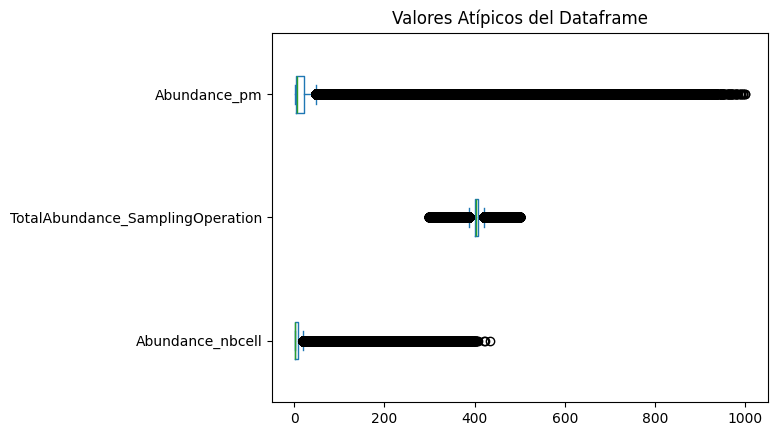

In [12]:
fig = plt.figure(figsize =(15, 8))
cuanti.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama


In [78]:
y=cuanti
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
#print("Limite superior permitido", Limite_Superior)
#print("Limite inferior permitido", Limite_Inferior)
#Limite_Inferior
Limite_Superior


Abundance_nbcell                     94.948382
TotalAbundance_SamplingOperation    437.096025
Abundance_pm                        233.878730
dtype: float64

In [14]:
df3= cuanti[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df3

,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,8.0,420.0,19.047619
1,1.0,404.0,2.475248
2,1.0,400.0,2.500000
3,2.0,400.0,5.000000
4,1.0,400.0,2.500000
...,...,...,...
1643867,1.0,412.0,2.427184
1643868,1.0,400.0,2.500000
1643869,1.0,403.0,2.481390
1643870,7.0,400.0,17.500000


In [15]:
valores_nulos=df3.isnull().sum()
valores_nulos

Abundance_nbcell                    37619
TotalAbundance_SamplingOperation    34628
Abundance_pm                        37352
dtype: int64

In [16]:

df3=df3.fillna(round(df3.median(),1))
df3

,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,8.0,420.0,19.047619
1,1.0,404.0,2.475248
2,1.0,400.0,2.500000
3,2.0,400.0,5.000000
4,1.0,400.0,2.500000
...,...,...,...
1643867,1.0,412.0,2.427184
1643868,1.0,400.0,2.500000
1643869,1.0,403.0,2.481390
1643870,7.0,400.0,17.500000


In [17]:
df_final = pd.concat([cuali, df3], axis=1)


In [18]:
valores_nulos=df_final.isnull().sum()
valores_nulos

TaxonName                           0
TaxonCode                           0
SamplingOperations_code             0
CodeSite_SamplingOperations         0
Date_SamplingOperation              0
Abundance_nbcell                    0
TotalAbundance_SamplingOperation    0
Abundance_pm                        0
dtype: int64

In [19]:
df_final.head()

,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,Achnanthes aapajaervensis,Achaa01,S04094200_20120910,S04094200,2012-09-10,8.0,420.0,19.047619
1,Achnanthes aapajaervensis,Achaa01,S05155300_20100728,S05155300,2010-07-28,1.0,404.0,2.475248
2,Achnanthes affinis,Achaf01,S02018780_20070808,S02018780,2007-08-08,1.0,400.0,2.500000
3,Achnanthes affinis,Achaf01,S02022675_20090803,S02022675,2009-08-03,2.0,400.0,5.000000
4,Achnanthes affinis,Achaf01,S02094920_20120726,S02094920,2012-07-26,1.0,400.0,2.500000


In [20]:
print(list(df_final.columns))


['TaxonName', 'TaxonCode', 'SamplingOperations_code', 'CodeSite_SamplingOperations', 'Date_SamplingOperation', 'Abundance_nbcell', 'TotalAbundance_SamplingOperation', 'Abundance_pm']


In [21]:
Tabla_freq = df_final['TaxonName'].value_counts().reset_index()
Tabla_freq

,TaxonName,count
0,Achnanthes minutissima,43691
1,Amphora pediculus,39209
2,Cocconeis euglypta,38570
3,Sellaphora nigri,38039
4,Navicula cryptotenella,37723
...,...,...
2287,Encyonopsis neoamphioxys,1
2288,Encyonopsis recta,1
2289,Lindavia bodanica,1
2290,Leptocylindrus minimus,1


In [22]:
Filtro= Tabla_freq[Tabla_freq['count']>27000]
Filtro

,TaxonName,count
0,Achnanthes minutissima,43691
1,Amphora pediculus,39209
2,Cocconeis euglypta,38570
3,Sellaphora nigri,38039
4,Navicula cryptotenella,37723
5,Nitzschia dissipata,34461
6,Vibrio tripunctatus,30899
7,Rhoicosphenia abbreviata,30560
8,Navicula permitis,29789
9,Achnanthes lanceolata,27239


In [23]:
Filtro_index= Filtro.set_index('TaxonName')
Filtro_index

,count
TaxonName,
Achnanthes minutissima,43691
Amphora pediculus,39209
Cocconeis euglypta,38570
Sellaphora nigri,38039
Navicula cryptotenella,37723
Nitzschia dissipata,34461
Vibrio tripunctatus,30899
Rhoicosphenia abbreviata,30560
Navicula permitis,29789


Text(0, 0.5, 'Frecuencia')

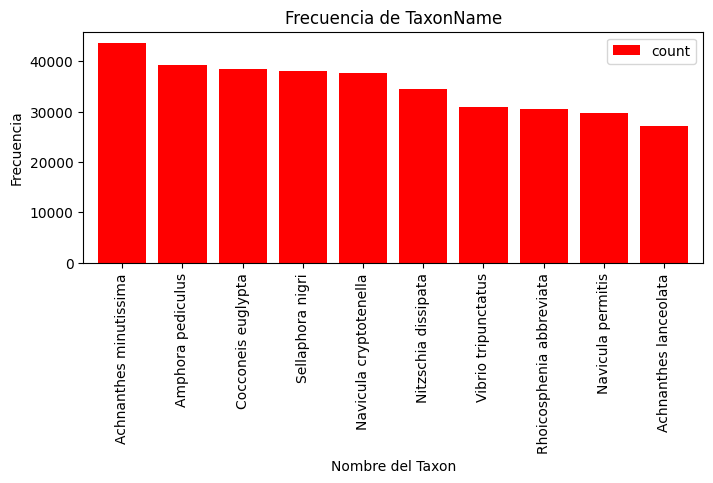

In [24]:
Filtro_index.plot(kind='bar', width=0.8, figsize=(8,3), color="red")
plt.title('Frecuencia de TaxonName')
plt.xlabel('Nombre del Taxon')
plt.ylabel('Frecuencia')


<Axes: xlabel='TaxonName'>

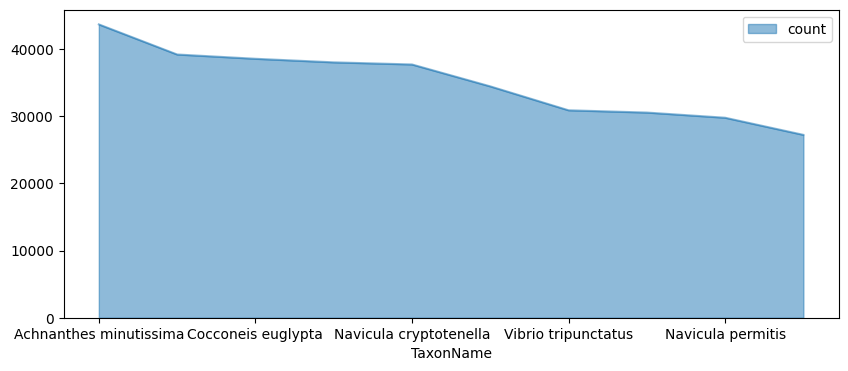

In [25]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.5)

In [26]:
Tabla_freq2 = df_final['TaxonCode'].value_counts().reset_index()
Tabla_freq2

,TaxonCode,count
0,Achmi02,43691
1,Amppe02,39209
2,Coceu01,38570
3,Selni01,38039
4,Navcr09,37723
...,...,...
2287,Encne03,1
2288,Encre01,1
2289,Linbo01,1
2290,Lepmi01,1


In [27]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro2= Tabla_freq2[Tabla_freq2['count']>27238]
Filtro2

,TaxonCode,count
0,Achmi02,43691
1,Amppe02,39209
2,Coceu01,38570
3,Selni01,38039
4,Navcr09,37723
5,Nitdi04,34461
6,Vibtr01,30899
7,Rhoab01,30560
8,Navpe05,29789
9,Achla02,27239


In [28]:
Filtro_index2= Filtro2.set_index('TaxonCode')
Filtro_index2

,count
TaxonCode,
Achmi02,43691
Amppe02,39209
Coceu01,38570
Selni01,38039
Navcr09,37723
Nitdi04,34461
Vibtr01,30899
Rhoab01,30560
Navpe05,29789


Text(0, 0.5, 'Frecuencia')

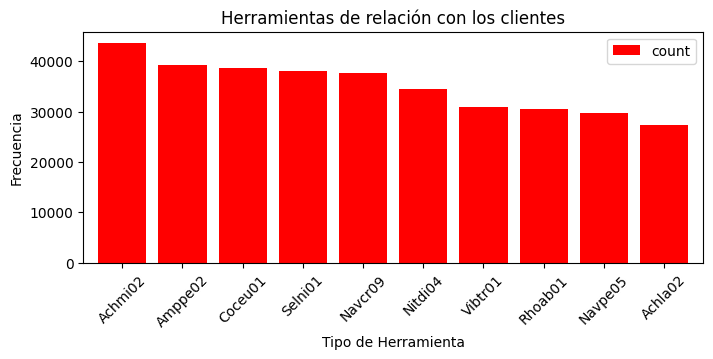

In [29]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index2.plot(kind = 'bar', width=0.8, figsize=(8,3), color= "red", rot=45)
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='TaxonCode'>

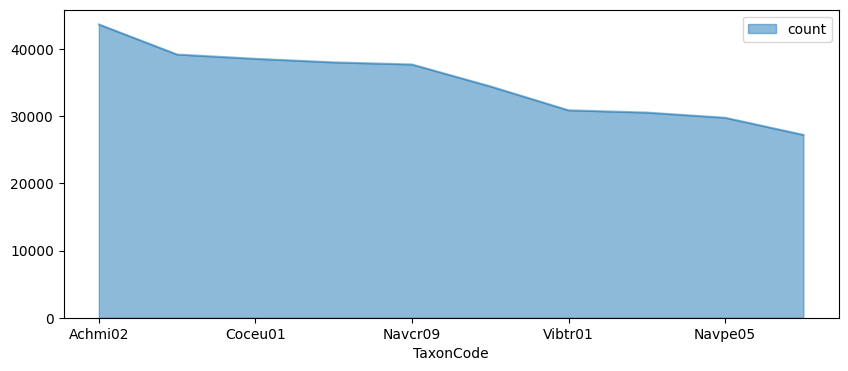

In [30]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index2.plot(kind='area', figsize=(10,4),alpha = 0.5)

In [31]:
Tabla_freq3 = df_final['SamplingOperations_code'].value_counts().reset_index()
Tabla_freq3.head(10)

,SamplingOperations_code,count
0,S05051000_20080722,97
1,S05119000_20160627,97
2,S05068700_20070904,94
3,S04103550_20150811,92
4,S04215520_20200702,92
5,S04304002_20200907,92
6,S04615008_20130719,91
7,S03132260_20120718,91
8,S04473008_20160711,89
9,S04103935_20200929,89


In [32]:
Filtro3= Tabla_freq3[Tabla_freq3['count']>88]
Filtro3

,SamplingOperations_code,count
0,S05051000_20080722,97
1,S05119000_20160627,97
2,S05068700_20070904,94
3,S04103550_20150811,92
4,S04215520_20200702,92
5,S04304002_20200907,92
6,S04615008_20130719,91
7,S03132260_20120718,91
8,S04473008_20160711,89
9,S04103935_20200929,89


In [33]:
Filtro_index3= Filtro3.set_index('SamplingOperations_code')
Filtro_index3

,count
SamplingOperations_code,
S05051000_20080722,97
S05119000_20160627,97
S05068700_20070904,94
S04103550_20150811,92
S04215520_20200702,92
S04304002_20200907,92
S04615008_20130719,91
S03132260_20120718,91
S04473008_20160711,89


Text(0, 0.5, 'Frecuencia')

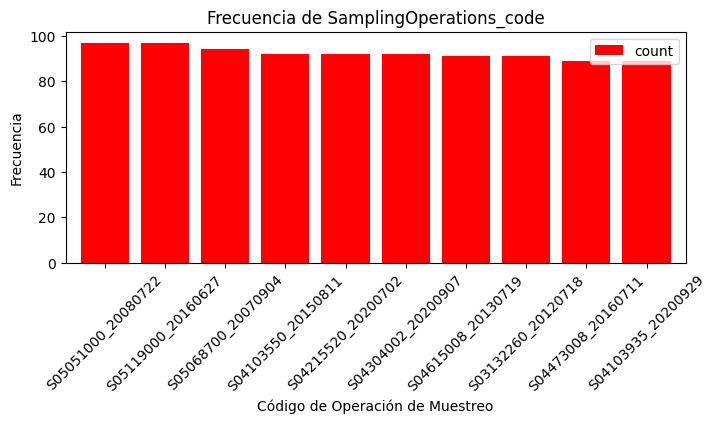

In [34]:
Filtro_index3.plot(kind='bar', width=0.8, figsize=(8,3), color="red", rot=45)
plt.title('Frecuencia de SamplingOperations_code')
plt.xlabel('Código de Operación de Muestreo')
plt.ylabel('Frecuencia')


In [35]:
Tabla_freq4 = df_final['Date_SamplingOperation'].value_counts().reset_index()
Tabla_freq4.head(10)

,Date_SamplingOperation,count
0,2013-07-11,4545
1,2013-07-17,4431
2,2013-07-16,4401
3,2015-07-08,4376
4,2018-07-17,4278
5,2015-06-24,4126
6,2012-07-25,4091
7,2012-07-24,3833
8,2016-07-21,3742
9,2016-07-20,3706


In [36]:
Filtro4= Tabla_freq4[Tabla_freq4['count']>3705]
Filtro4

,Date_SamplingOperation,count
0,2013-07-11,4545
1,2013-07-17,4431
2,2013-07-16,4401
3,2015-07-08,4376
4,2018-07-17,4278
5,2015-06-24,4126
6,2012-07-25,4091
7,2012-07-24,3833
8,2016-07-21,3742
9,2016-07-20,3706


In [37]:
Filtro_index4= Filtro4.set_index('Date_SamplingOperation')
Filtro_index4

,count
Date_SamplingOperation,
2013-07-11,4545
2013-07-17,4431
2013-07-16,4401
2015-07-08,4376
2018-07-17,4278
2015-06-24,4126
2012-07-25,4091
2012-07-24,3833
2016-07-21,3742


Text(0, 0.5, 'Frecuencia')

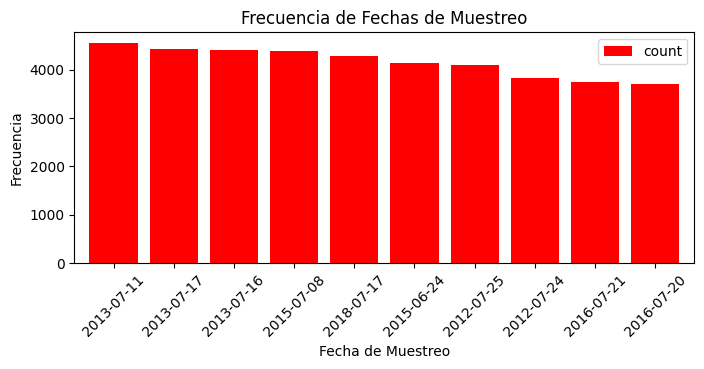

In [38]:
Filtro_index4.plot(kind='bar', width=0.8, figsize=(8,3), color="red", rot=45)
plt.title('Frecuencia de Fechas de Muestreo')
plt.xlabel('Fecha de Muestreo')
plt.ylabel('Frecuencia')

In [39]:
#Calculamos el numero total de la población "n"
df_final['Abundance_nbcell']. info()
n=1643872

<class 'pandas.core.series.Series'>
RangeIndex: 1643872 entries, 0 to 1643871
Series name: Abundance_nbcell
Non-Null Count    Dtype  
--------------    -----  
1643872 non-null  float64
dtypes: float64(1)
memory usage: 12.5 MB


In [40]:
Max=df_final['Abundance_nbcell'].max()
Min=df_final['Abundance_nbcell'].min()
Limites= [Min, Max]
Limites

[np.float64(1.0), np.float64(94.0)]

In [41]:
R=Max-Min
R

np.float64(93.0)

In [42]:
ni= 1+3.32*np.log10(n)
ni

np.float64(21.636681754041682)

In [43]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

np.float64(4.298256130824118)

In [44]:
intervalos=np.linspace(0.0, 94.1, 22)
intervalos

array([ 0.        ,  4.48095238,  8.96190476, 13.44285714, 17.92380952,
       22.4047619 , 26.88571429, 31.36666667, 35.84761905, 40.32857143,
       44.80952381, 49.29047619, 53.77142857, 58.25238095, 62.73333333,
       67.21428571, 71.6952381 , 76.17619048, 80.65714286, 85.13809524,
       89.61904762, 94.1       ])

In [45]:
categorias = [
    "Categoría 1 (1 a 5)",
    "Categoría 2 (6 a 10)",
    "Categoría 3 (11 a 14)",
    "Categoría 4 (15 a 19)",
    "Categoría 5 (20 a 23)",
    "Categoría 6 (24 a 28)",
    "Categoría 7 (29 a 32)",
    "Categoría 8 (33 a 36)",
    "Categoría 9 (37 a 41)",
    "Categoría 10 (42 a 45)",
    "Categoría 11 (46 a 50)",
    "Categoría 12 (51 a 54)",
    "Categoría 13 (55 a 59)",
    "Categoría 14 (60 a 63)",
    "Categoría 15 (64 a 67)",
    "Categoría 16 (68 a 72)",
    "Categoría 17 (73 a 76)",
    "Categoría 18 (77 a 81)",
    "Categoría 19 (82 a 85)",
    "Categoría 20 (86 a 90)",
    "Categoría 21 (91 a 94)"
]


In [46]:
df_final['Abundance_nbcell']=pd.cut(x= df_final['Abundance_nbcell'], bins=intervalos, labels= categorias)
df_final['Abundance_nbcell']

0          Categoría 2 (6 a 10)
1           Categoría 1 (1 a 5)
2           Categoría 1 (1 a 5)
3           Categoría 1 (1 a 5)
4           Categoría 1 (1 a 5)
                   ...         
1643867     Categoría 1 (1 a 5)
1643868     Categoría 1 (1 a 5)
1643869     Categoría 1 (1 a 5)
1643870    Categoría 2 (6 a 10)
1643871     Categoría 1 (1 a 5)
Name: Abundance_nbcell, Length: 1643872, dtype: category
Categories (21, object): ['Categoría 1 (1 a 5)' < 'Categoría 2 (6 a 10)' < 'Categoría 3 (11 a 14)' < 'Categoría 4 (15 a 19)' ... 'Categoría 18 (77 a 81)' < 'Categoría 19 (82 a 85)' < 'Categoría 20 (86 a 90)' < 'Categoría 21 (91 a 94)']

In [47]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq5 = df_final['Abundance_nbcell'].value_counts().reset_index()
Tabla_freq5

,Abundance_nbcell,count
0,Categoría 1 (1 a 5),1029011
1,Categoría 2 (6 a 10),222430
2,Categoría 3 (11 a 14),124121
3,Categoría 4 (15 a 19),58398
4,Categoría 5 (20 a 23),48843
5,Categoría 6 (24 a 28),27953
6,Categoría 7 (29 a 32),25819
7,Categoría 9 (37 a 41),16873
8,Categoría 8 (33 a 36),16490
9,Categoría 11 (46 a 50),11287


In [48]:
Filtro5= Tabla_freq5[Tabla_freq5['count']>0]
Filtro5

,Abundance_nbcell,count
0,Categoría 1 (1 a 5),1029011
1,Categoría 2 (6 a 10),222430
2,Categoría 3 (11 a 14),124121
3,Categoría 4 (15 a 19),58398
4,Categoría 5 (20 a 23),48843
5,Categoría 6 (24 a 28),27953
6,Categoría 7 (29 a 32),25819
7,Categoría 9 (37 a 41),16873
8,Categoría 8 (33 a 36),16490
9,Categoría 11 (46 a 50),11287


In [49]:
Filtro_index5= Filtro5.set_index('Abundance_nbcell')
Filtro_index5

,count
Abundance_nbcell,
Categoría 1 (1 a 5),1029011
Categoría 2 (6 a 10),222430
Categoría 3 (11 a 14),124121
Categoría 4 (15 a 19),58398
Categoría 5 (20 a 23),48843
Categoría 6 (24 a 28),27953
Categoría 7 (29 a 32),25819
Categoría 9 (37 a 41),16873
Categoría 8 (33 a 36),16490


Text(0, 0.5, 'Frecuencia')

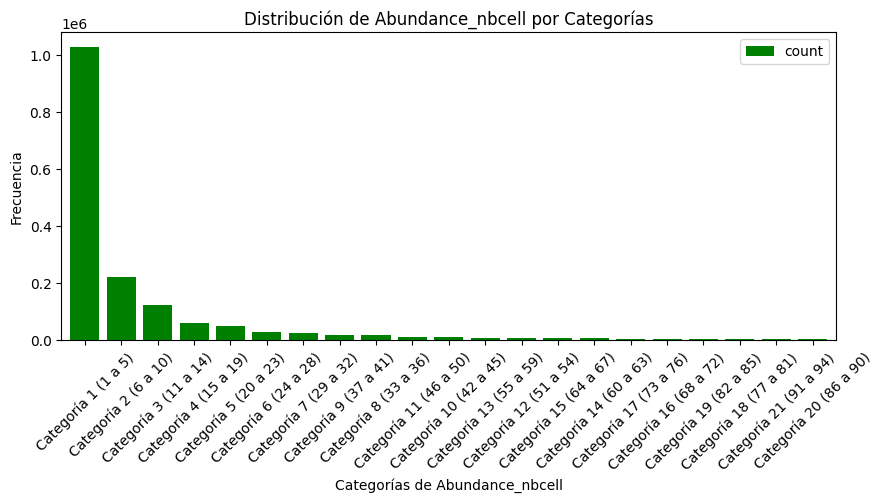

In [50]:
Filtro_index5.plot(kind='bar', width=0.8, figsize=(10,4), color="green", rot=45)
plt.title('Distribución de Abundance_nbcell por Categorías')
plt.xlabel('Categorías de Abundance_nbcell')
plt.ylabel('Frecuencia')



In [51]:
df_final['TotalAbundance_SamplingOperation']. info()
n=1643872

<class 'pandas.core.series.Series'>
RangeIndex: 1643872 entries, 0 to 1643871
Series name: TotalAbundance_SamplingOperation
Non-Null Count    Dtype  
--------------    -----  
1643872 non-null  float64
dtypes: float64(1)
memory usage: 12.5 MB


In [52]:
Max=df_final['TotalAbundance_SamplingOperation'].max()
Min=df_final['TotalAbundance_SamplingOperation'].min()
Limites= [Min, Max]
Limites

[np.float64(375.0), np.float64(437.0)]

In [53]:
#Calculamos el rango R
R=Max-Min
R

np.float64(62.0)

In [54]:
ni= 1+3.32*np.log10(n)
ni

np.float64(21.636681754041682)

In [55]:
i=R/ni
i

np.float64(2.865504087216079)

In [56]:
intervalos=np.linspace(374.9, 437.1, 22)
intervalos

array([374.9       , 377.86190476, 380.82380952, 383.78571429,
       386.74761905, 389.70952381, 392.67142857, 395.63333333,
       398.5952381 , 401.55714286, 404.51904762, 407.48095238,
       410.44285714, 413.4047619 , 416.36666667, 419.32857143,
       422.29047619, 425.25238095, 428.21428571, 431.17619048,
       434.13809524, 437.1       ])

In [57]:
categorias = [
    "Categoría 1 (375 a 378)",
    "Categoría 2 (379 a 381)",
    "Categoría 3 (382 a 384)",
    "Categoría 4 (385 a 387)",
    "Categoría 5 (388 a 390)",
    "Categoría 6 (391 a 393)",
    "Categoría 7 (394 a 396)",
    "Categoría 8 (397 a 399)",
    "Categoría 9 (400 a 402)",
    "Categoría 10 (403 a 405)",
    "Categoría 11 (406 a 407)",
    "Categoría 12 (408 a 410)",
    "Categoría 13 (411 a 413)",
    "Categoría 14 (414 a 416)",
    "Categoría 15 (417 a 419)",
    "Categoría 16 (420 a 422)",
    "Categoría 17 (423 a 425)",
    "Categoría 18 (426 a 428)",
    "Categoría 19 (429 a 431)",
    "Categoría 20 (432 a 434)",
    "Categoría 21 (435 a 437)"
]


In [58]:
df_final['TotalAbundance_SamplingOperation']=pd.cut(x= df_final['TotalAbundance_SamplingOperation'], bins=intervalos, labels= categorias)
df_final['TotalAbundance_SamplingOperation']

0          Categoría 16 (420 a 422)
1          Categoría 10 (403 a 405)
2           Categoría 9 (400 a 402)
3           Categoría 9 (400 a 402)
4           Categoría 9 (400 a 402)
                     ...           
1643867    Categoría 13 (411 a 413)
1643868     Categoría 9 (400 a 402)
1643869    Categoría 10 (403 a 405)
1643870     Categoría 9 (400 a 402)
1643871     Categoría 9 (400 a 402)
Name: TotalAbundance_SamplingOperation, Length: 1643872, dtype: category
Categories (21, object): ['Categoría 1 (375 a 378)' < 'Categoría 2 (379 a 381)' < 'Categoría 3 (382 a 384)' < 'Categoría 4 (385 a 387)' ... 'Categoría 18 (426 a 428)' < 'Categoría 19 (429 a 431)' < 'Categoría 20 (432 a 434)' < 'Categoría 21 (435 a 437)']

In [59]:
Tabla_freq6 = df_final['TotalAbundance_SamplingOperation'].value_counts().reset_index()
Tabla_freq6

,TotalAbundance_SamplingOperation,count
0,Categoría 9 (400 a 402),522234
1,Categoría 10 (403 a 405),383742
2,Categoría 11 (406 a 407),237322
3,Categoría 12 (408 a 410),155486
4,Categoría 13 (411 a 413),95422
5,Categoría 14 (414 a 416),63255
6,Categoría 15 (417 a 419),51264
7,Categoría 8 (397 a 399),38516
8,Categoría 16 (420 a 422),32822
9,Categoría 7 (394 a 396),10984


In [60]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro6= Tabla_freq6[Tabla_freq6['count']>0]
Filtro6

,TotalAbundance_SamplingOperation,count
0,Categoría 9 (400 a 402),522234
1,Categoría 10 (403 a 405),383742
2,Categoría 11 (406 a 407),237322
3,Categoría 12 (408 a 410),155486
4,Categoría 13 (411 a 413),95422
5,Categoría 14 (414 a 416),63255
6,Categoría 15 (417 a 419),51264
7,Categoría 8 (397 a 399),38516
8,Categoría 16 (420 a 422),32822
9,Categoría 7 (394 a 396),10984


In [61]:
Filtro_index6= Filtro6.set_index('TotalAbundance_SamplingOperation')
Filtro_index6

,count
TotalAbundance_SamplingOperation,
Categoría 9 (400 a 402),522234
Categoría 10 (403 a 405),383742
Categoría 11 (406 a 407),237322
Categoría 12 (408 a 410),155486
Categoría 13 (411 a 413),95422
Categoría 14 (414 a 416),63255
Categoría 15 (417 a 419),51264
Categoría 8 (397 a 399),38516
Categoría 16 (420 a 422),32822


Text(0, 0.5, 'Frecuencia')

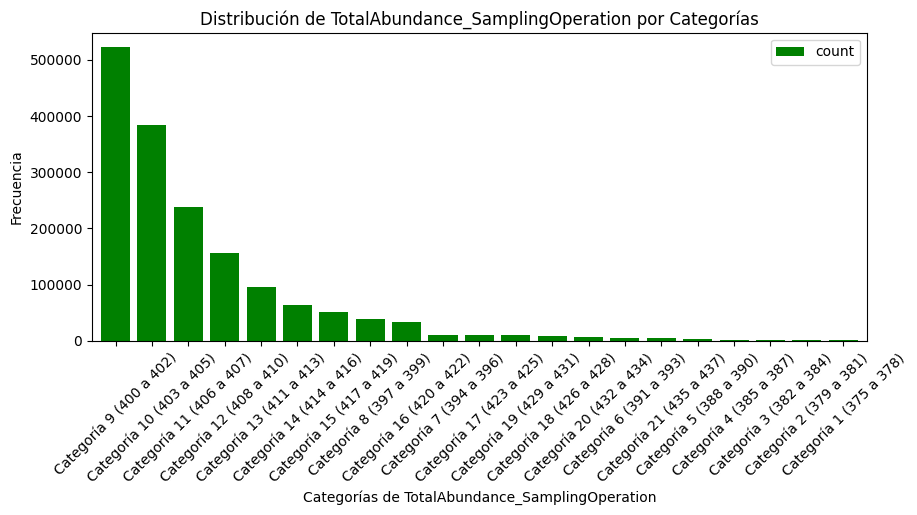

In [62]:
Filtro_index6.plot(kind='bar', width=0.8, figsize=(10,4), color="green", rot=45)
plt.title('Distribución de TotalAbundance_SamplingOperation por Categorías')
plt.xlabel('Categorías de TotalAbundance_SamplingOperation')
plt.ylabel('Frecuencia')


In [63]:
df_final['Abundance_pm']. info()
n=1643872

<class 'pandas.core.series.Series'>
RangeIndex: 1643872 entries, 0 to 1643871
Series name: Abundance_pm
Non-Null Count    Dtype  
--------------    -----  
1643872 non-null  float64
dtypes: float64(1)
memory usage: 12.5 MB


In [64]:
Max=df_final['Abundance_pm'].max()
Min=df_final['Abundance_pm'].min()
Limites= [Min, Max]
Limites

[np.float64(2.0), np.float64(233.85300668151447)]

In [65]:
R=Max-Min
R

np.float64(231.85300668151447)

In [66]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(n)
ni

np.float64(21.636681754041682)

In [67]:
i=R/ni
i

np.float64(10.715737714180912)

In [68]:
intervalos=np.linspace(1.9, 233.9, 22)
intervalos

array([  1.9       ,  12.94761905,  23.9952381 ,  35.04285714,
        46.09047619,  57.13809524,  68.18571429,  79.23333333,
        90.28095238, 101.32857143, 112.37619048, 123.42380952,
       134.47142857, 145.51904762, 156.56666667, 167.61428571,
       178.66190476, 189.70952381, 200.75714286, 211.8047619 ,
       222.85238095, 233.9       ])

In [69]:
categorias = [
    "Categoría 1 (2 a 13)",
    "Categoría 2 (14 a 24)",
    "Categoría 3 (25 a 35)",
    "Categoría 4 (36 a 46)",
    "Categoría 5 (47 a 57)",
    "Categoría 6 (58 a 68)",
    "Categoría 7 (69 a 79)",
    "Categoría 8 (80 a 90)",
    "Categoría 9 (91 a 101)",
    "Categoría 10 (102 a 112)",
    "Categoría 11 (113 a 123)",
    "Categoría 12 (124 a 134)",
    "Categoría 13 (135 a 146)",
    "Categoría 14 (147 a 157)",
    "Categoría 15 (158 a 168)",
    "Categoría 16 (169 a 179)",
    "Categoría 17 (180 a 190)",
    "Categoría 18 (191 a 201)",
    "Categoría 19 (202 a 212)",
    "Categoría 20 (213 a 223)",
    "Categoría 21 (224 a 234)"
]


In [70]:
df_final['Abundance_pm']=pd.cut(x= df_final['Abundance_pm'], bins=intervalos, labels= categorias)
df_final['Abundance_pm']

0          Categoría 2 (14 a 24)
1           Categoría 1 (2 a 13)
2           Categoría 1 (2 a 13)
3           Categoría 1 (2 a 13)
4           Categoría 1 (2 a 13)
                   ...          
1643867     Categoría 1 (2 a 13)
1643868     Categoría 1 (2 a 13)
1643869     Categoría 1 (2 a 13)
1643870    Categoría 2 (14 a 24)
1643871     Categoría 1 (2 a 13)
Name: Abundance_pm, Length: 1643872, dtype: category
Categories (21, object): ['Categoría 1 (2 a 13)' < 'Categoría 2 (14 a 24)' < 'Categoría 3 (25 a 35)' < 'Categoría 4 (36 a 46)' ... 'Categoría 18 (191 a 201)' < 'Categoría 19 (202 a 212)' < 'Categoría 20 (213 a 223)' < 'Categoría 21 (224 a 234)']

In [71]:
Tabla_freq7 = df_final['Abundance_pm'].value_counts().reset_index()
Tabla_freq7

,Abundance_pm,count
0,Categoría 1 (2 a 13),1097633
1,Categoría 2 (14 a 24),187224
2,Categoría 3 (25 a 35),107706
3,Categoría 4 (36 a 46),54461
4,Categoría 5 (47 a 57),39998
5,Categoría 6 (58 a 68),30440
6,Categoría 7 (69 a 79),21536
7,Categoría 8 (80 a 90),18417
8,Categoría 9 (91 a 101),13935
9,Categoría 10 (102 a 112),11741


In [72]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro7= Tabla_freq7[Tabla_freq7['count']>0]
Filtro7

,Abundance_pm,count
0,Categoría 1 (2 a 13),1097633
1,Categoría 2 (14 a 24),187224
2,Categoría 3 (25 a 35),107706
3,Categoría 4 (36 a 46),54461
4,Categoría 5 (47 a 57),39998
5,Categoría 6 (58 a 68),30440
6,Categoría 7 (69 a 79),21536
7,Categoría 8 (80 a 90),18417
8,Categoría 9 (91 a 101),13935
9,Categoría 10 (102 a 112),11741


In [73]:
Filtro_index7=Filtro7.set_index('Abundance_pm')
Filtro_index7

,count
Abundance_pm,
Categoría 1 (2 a 13),1097633
Categoría 2 (14 a 24),187224
Categoría 3 (25 a 35),107706
Categoría 4 (36 a 46),54461
Categoría 5 (47 a 57),39998
Categoría 6 (58 a 68),30440
Categoría 7 (69 a 79),21536
Categoría 8 (80 a 90),18417
Categoría 9 (91 a 101),13935


Text(0, 0.5, 'Frecuencia')

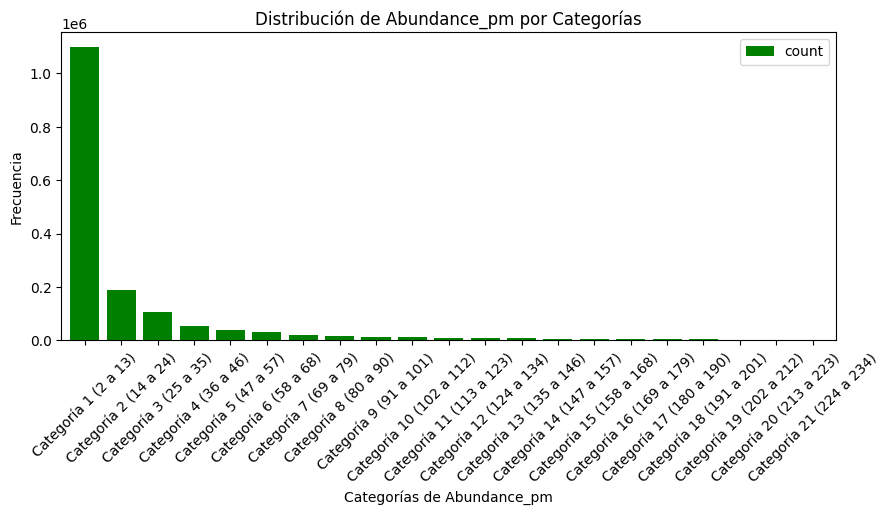

In [74]:
Filtro_index7.plot(kind='bar', width=0.8, figsize=(10,4), color="green", rot=45)
plt.title('Distribución de Abundance_pm por Categorías')
plt.xlabel('Categorías de Abundance_pm')
plt.ylabel('Frecuencia')

